In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as Soup
import pandas as pd
import time
import numpy as np
import dtw
import matplotlib.pyplot as plt
import csv
import kss
from sklearn.preprocessing import *


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [20]:
options = webdriver.ChromeOptions()
prefs = {'profile.default_content_setting_values': {'cookies' : 2, 'images': 2, 'plugins' : 2, 'popups': 2, 'geolocation': 2, 'notifications' : 2, 'auto_select_certificate': 2, 'fullscreen' : 2, 'mouselock' : 2, 'mixed_script': 2, 'media_stream' : 2, 'media_stream_mic' : 2, 'media_stream_camera': 2, 'protocol_handlers' : 2, 'ppapi_broker' : 2, 'automatic_downloads': 2, 'midi_sysex' : 2, 'push_messaging' : 2, 'ssl_cert_decisions': 2, 'metro_switch_to_desktop' : 2, 'protected_media_identifier': 2, 'app_banner': 2, 'site_engagement' : 2, 'durable_storage' : 2}}   
options.add_experimental_option('prefs', prefs)
#options.headless = True
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)")
driver = webdriver.Chrome(options=options)


driver.get("https://news.daum.net/breakingnews/society?page=1&regDate=20230101")
    
html = driver.page_source
soup = Soup(html, 'html.parser')
header_list = []
data_ix = pd.date_range("2023/01/01",periods=274,freq="D")

df_header = pd.DataFrame(columns=['header'], index= data_ix)

for i in range(274):
    driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[3]/div/span/a[10]").click()
    for j in range(10):
        for n in range(1, 15) :
            n = str(n)
            try :
                header_list.append(driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[3]/ul/li["+n+"]/div/strong/a").text)
            except :
                break
        try :
            driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[3]/div/span/a[11]").click()
        except :
            break
        time.sleep(1)
    df_header.iat[i,0] = header_list
    header_list = []
    driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div[1]/div[1]/div/div[1]/a[3]').click()
    time.sleep(1)
    
df_header.to_csv('daum_header 2023.csv', sep=',', float_format='%.64f')
print("complete")

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=117.0.5938.149)
Stacktrace:
	GetHandleVerifier [0x00007FF6F895AFD2+57938]
	(No symbol) [0x00007FF6F88C7C02]
	(No symbol) [0x00007FF6F877DAAB]
	(No symbol) [0x00007FF6F875DEE8]
	(No symbol) [0x00007FF6F87E3507]
	(No symbol) [0x00007FF6F87F6F1F]
	(No symbol) [0x00007FF6F87DE8C3]
	(No symbol) [0x00007FF6F87B36D1]
	(No symbol) [0x00007FF6F87B4914]
	GetHandleVerifier [0x00007FF6F8CBE772+3611122]
	GetHandleVerifier [0x00007FF6F8D11640+3950784]
	GetHandleVerifier [0x00007FF6F8D0A6EF+3922287]
	GetHandleVerifier [0x00007FF6F89F8996+703510]
	(No symbol) [0x00007FF6F88D2B98]
	(No symbol) [0x00007FF6F88CE754]
	(No symbol) [0x00007FF6F88CE882]
	(No symbol) [0x00007FF6F88BF2A3]
	BaseThreadInitThunk [0x00007FFEDF407344+20]
	RtlUserThreadStart [0x00007FFEE04C26B1+33]


In [3]:
df_csv_head = pd.read_csv("daum_header 220520.csv")
df_csv_head.head()
df_2012 = pd.read_csv("daum_header 2012.csv")
df_2013 = pd.read_csv("daum_header 2013.csv")
df_2014 = pd.read_csv("daum_header 2014.csv")
df_2015 = pd.read_csv("daum_header 2015.csv")

df_2012_15 = pd.concat([df_2012, df_2013, df_2014, df_2015])
print(df_2012_15)



     Unnamed: 0                                             header
0    2012-01-01  ['밤사이 영동 많은 눈..출근길 영하권 추위', '"일진회 해체" 형사 1만200...
1    2012-01-02  ['스스로 \'개\'에 비유.."모두 외면했다" 자포자기', "[집중취재] 중학생의...
2    2012-01-03  ['4대강 사업 수질조사', "'종업원 범죄땐 업주도 처벌' 청소년보호법 양벌규정 ...
3    2012-01-04  ['종편 특혜 \'미디어렙법안\' 5일 처리언론단체 "방송사 이전투구 불보듯"', ...
4    2012-01-05  ['반기문 총장 "적절한 시기 방북 용의"<교도통신>', '[부음] 신강균씨(MBC...
..          ...                                                ...
360  2015-12-27  ['결국 일제 강제동원委 31일 해산.. 활동 연장 등 골자 法 통과 안돼', '[...
361  2015-12-28  ['"해맞이 명소 수도권도 많아요".. 서울시, 각 자치구와 함께 19개 산·공원서...
362  2015-12-29  ['[포토] 사랑의 온도탑', '동두천·여주·가평·연천 산모는 좋겠네', '정명훈 ...
363  2015-12-30  ["[탐사플러스] '지게차 사고' 그 후..산재은폐 여전한 노동현장", "'밤선비'...
364  2015-12-31  ['연기대상 지성, 황정음 향한 고마움.."너무 고마웠다."', '(1) 담장 위 ...

[1460 rows x 2 columns]


In [4]:
df_p_t = pd.date_range("2012/01/01",periods=1460,freq="D")
df_pr = pd.DataFrame(columns=['pr_header', 'cnt'], index= df_p_t)
for q, b in zip(df_2012_15["header"], range(1460)) :
    tt = kss.split_morphemes(q, return_pos = False)
    
    df_pr.iat[b,0] = tt
print(df_pr)

[Kss]: Oh! You have mecab in your environment. Kss will take this as a backend! :D



                                                    pr_header  cnt
2012-01-01  [[, ', 밤사이, 영동, 많, 은, 눈, ., ., 출근길, 영하, 권, 추위,...  NaN
2012-01-02  [[, ', 스스로, \', 개, \', 에, 비유, ., .", 모두, 외면, 했...  NaN
2012-01-03  [[, ', 4, 대강, 사업, 수질, 조사, ',, "', 종업원, 범죄, 땐, ...  NaN
2012-01-04  [[, ', 종편, 특혜, \', 미디어, 렙, 법안, \', 5, 일, 처리, 언...  NaN
2012-01-05  [[, ', 반기문, 총장, ", 적절, 한, 시기, 방북, 용, 의, "<, 교도...  NaN
...                                                       ...  ...
2015-12-26  [[, ', 결국, 일제, 강제, 동원, 委, 31, 일, 해산, ., ., 활동,...  NaN
2015-12-27  [[, '", 해맞이, 명소, 수도, 권, 도, 많, 아요, ".., 서울시, ,,...  NaN
2015-12-28  [[, '[, 포토, ], 사랑, 의, 온도, 탑, ',, ', 동두천, ·, 여주...  NaN
2015-12-29  [[, "[, 탐사, 플러스, ], ', 지게차, 사고, ', 그, 후, ., .,...  NaN
2015-12-30  [[, ', 연기, 대상, 지성, ,, 황정음, 향한, 고마움, ., .", 너무,...  NaN

[1460 rows x 2 columns]


In [5]:
hate = "갈등 추락 기소 불편 거짓 난동 폭언 부글부글 인재 아동학대 사망 책임 산재 배신 촉법소년 마약 슬쩍 난입 흉기 살인미수 괴롭힘 우울 우울감 폭력 욕설 비극 비상 폐쇄 유출 횡령 희롱 방화 우울증 차별 숨져 논란 항의 투신 통곡 살해 사고 고독사 숨진채 흉악범죄 얼룩 중독 학폭 사망 불법 비판 기피 무시 슬쩍 후유증 적신호 사기 피싱 거부 블랙리스트 갑질 중상 하락 반발 비극 비리 자살 침해 외로움 규탄 꼼수 진상 "
hate = hate.split()
print(hate)
count = 0 
cnt_list = []
for i, c in zip(df_pr["pr_header"], range(1460)) :
    #str_i = ''.join(i)
    for h in hate :
        if h in i :
            count+=1
    cnt_list.append(count)
    df_pr.iat[c, 1] = count
    count = 0
print(df_pr)


['갈등', '추락', '기소', '불편', '거짓', '난동', '폭언', '부글부글', '인재', '아동학대', '사망', '책임', '산재', '배신', '촉법소년', '마약', '슬쩍', '난입', '흉기', '살인미수', '괴롭힘', '우울', '우울감', '폭력', '욕설', '비극', '비상', '폐쇄', '유출', '횡령', '희롱', '방화', '우울증', '차별', '숨져', '논란', '항의', '투신', '통곡', '살해', '사고', '고독사', '숨진채', '흉악범죄', '얼룩', '중독', '학폭', '사망', '불법', '비판', '기피', '무시', '슬쩍', '후유증', '적신호', '사기', '피싱', '거부', '블랙리스트', '갑질', '중상', '하락', '반발', '비극', '비리', '자살', '침해', '외로움', '규탄', '꼼수', '진상']
                                                    pr_header cnt
2012-01-01  [[, ', 밤사이, 영동, 많, 은, 눈, ., ., 출근길, 영하, 권, 추위,...   8
2012-01-02  [[, ', 스스로, \', 개, \', 에, 비유, ., .", 모두, 외면, 했...   8
2012-01-03  [[, ', 4, 대강, 사업, 수질, 조사, ',, "', 종업원, 범죄, 땐, ...   9
2012-01-04  [[, ', 종편, 특혜, \', 미디어, 렙, 법안, \', 5, 일, 처리, 언...   6
2012-01-05  [[, ', 반기문, 총장, ", 적절, 한, 시기, 방북, 용, 의, "<, 교도...  13
...                                                       ...  ..
2015-12-26  [[, ', 결국, 일제, 강제, 동원, 委, 31, 일, 해산, ., ., 활동,...   6
2015-12-27  [[, '", 해맞이,

In [9]:
df_cnt = pd.DataFrame()
df_year_cnt = pd.DataFrame()
df_cnt["cnt_sum"] = df_pr.cnt.resample('1M').sum()
df_year_cnt["year_cnt_sum"] = df_pr.cnt.resample('1Y').sum()
print(df_cnt)
print(df_year_cnt)

           cnt_sum
2012-01-31     277
2012-02-29     272
2012-03-31     264
2012-04-30     282
2012-05-31     284
2012-06-30     315
2012-07-31     280
2012-08-31     297
2012-09-30     276
2012-10-31     276
2012-11-30     290
2012-12-31     248
2013-01-31     295
2013-02-28     236
2013-03-31     271
2013-04-30     249
2013-05-31     277
2013-06-30     292
2013-07-31     295
2013-08-31     288
2013-09-30     221
2013-10-31     289
2013-11-30     279
2013-12-31     292
2014-01-31     285
2014-02-28     272
2014-03-31     290
2014-04-30     285
2014-05-31     291
2014-06-30     258
2014-07-31     302
2014-08-31     301
2014-09-30     298
2014-10-31     319
2014-11-30     343
2014-12-31     336
2015-01-31     317
2015-02-28     313
2015-03-31     347
2015-04-30     292
2015-05-31     297
2015-06-30     310
2015-07-31     339
2015-08-31     296
2015-09-30     317
2015-10-31     350
2015-11-30     307
2015-12-31     304
           year_cnt_sum
2012-12-31         3361
2013-12-31         32

In [16]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
df_sl_cnt = std_scaler.fit_transform(df_cnt)
df_sl_cnt = mm_scaler.fit_transform(df_sl_cnt)
print(df_sl_cnt)

[[0.43410853]
 [0.39534884]
 [0.33333333]
 [0.47286822]
 [0.48837209]
 [0.72868217]
 [0.45736434]
 [0.58914729]
 [0.42635659]
 [0.42635659]
 [0.53488372]
 [0.20930233]
 [0.57364341]
 [0.11627907]
 [0.3875969 ]
 [0.21705426]
 [0.43410853]
 [0.5503876 ]
 [0.57364341]
 [0.51937984]
 [0.        ]
 [0.52713178]
 [0.4496124 ]
 [0.5503876 ]
 [0.49612403]
 [0.39534884]
 [0.53488372]
 [0.49612403]
 [0.54263566]
 [0.28682171]
 [0.62790698]
 [0.62015504]
 [0.59689922]
 [0.75968992]
 [0.94573643]
 [0.89147287]
 [0.74418605]
 [0.71317829]
 [0.97674419]
 [0.5503876 ]
 [0.58914729]
 [0.68992248]
 [0.91472868]
 [0.58139535]
 [0.74418605]
 [1.        ]
 [0.66666667]
 [0.64341085]]


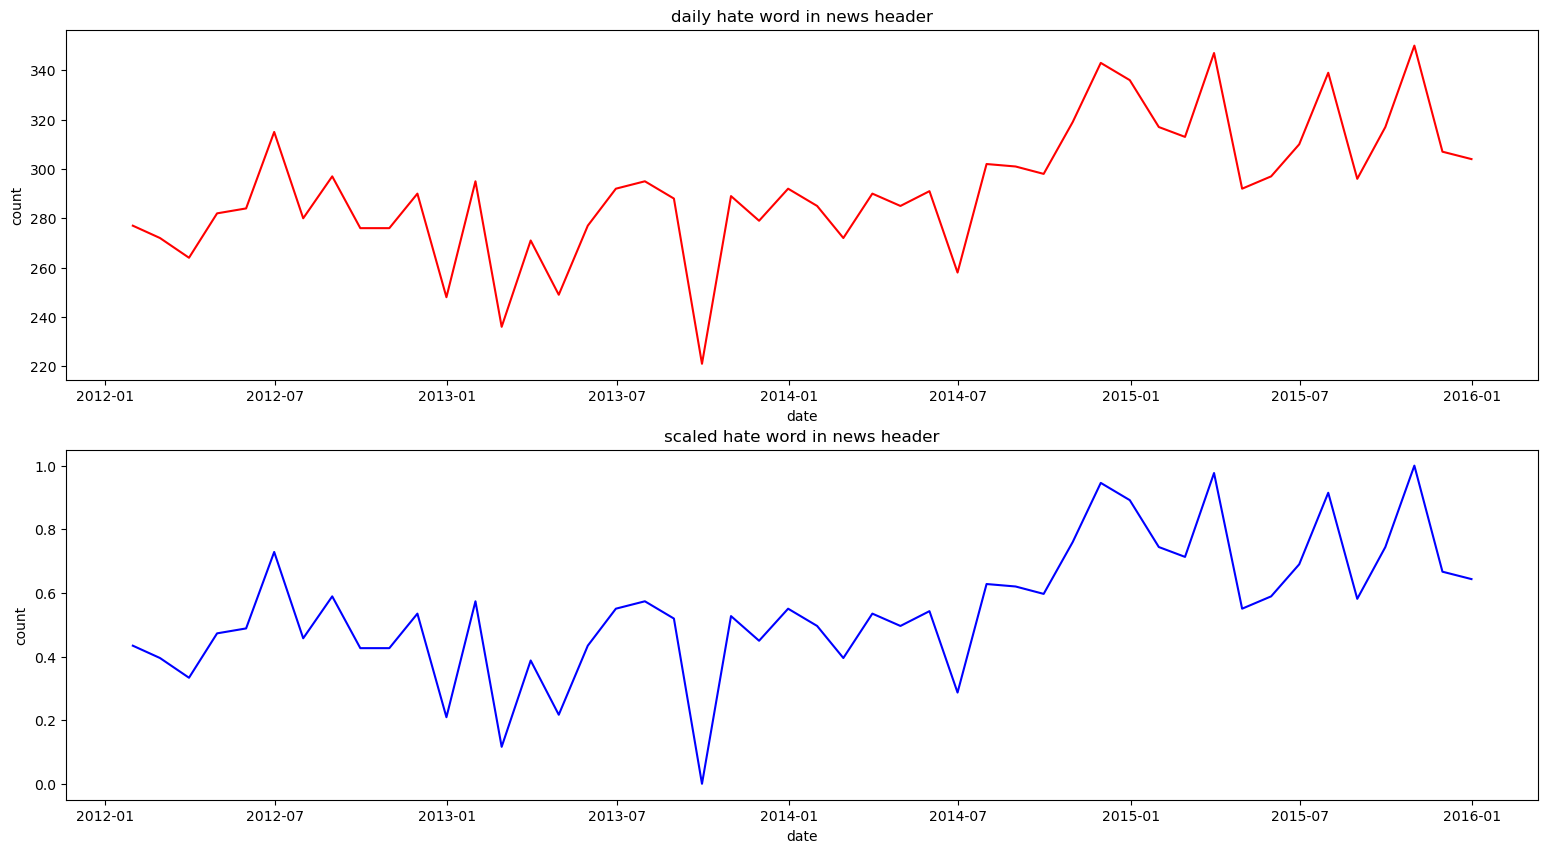

In [26]:
plt.figure(figsize = (19,10))
plt.subplot(2,1,1)
plt.plot(df_cnt.index, df_cnt["cnt_sum"], 'r')
plt.title("daily hate word in news header")
plt.xlabel("date")
plt.ylabel("count")

plt.subplot(2,1,2)
plt.plot(df_cnt.index, df_sl_cnt, 'b')
plt.title("scaled hate word in news header")
plt.xlabel("date")
plt.ylabel("count")
plt.show()

In [65]:
birth_df = pd.read_csv("출생_2012_2016.csv")
birth_df.head()
print(birth_df.index, birth_df.columns)
birth_df_1 = birth_df.drop([0,5], axis=0)
birth_df_1.head()
birth_df_1 = birth_df_1.drop([ '자치구별(1)', '시점', '모의 평균 출산 연령 (세)', '모의 연령별 출생아수 (세)',
       '모의 연령별 출생아수 (세).1', '모의 연령별 출생아수 (세).2', '모의 연령별 출생아수 (세).3',
       '모의 연령별 출생아수 (세).4', '모의 연령별 출생아수 (세).5', '모의 연령별 출생아수 (세).6' ], axis = 1)

birth_df_1.head()
birth_df_1.to_csv("2012_2015 출산율.csv")

RangeIndex(start=0, stop=6, step=1) Index(['자치구별(1)', '시점', '모의 평균 출산 연령 (세)', '출생아수 (명)', '모의 연령별 출생아수 (세)',
       '모의 연령별 출생아수 (세).1', '모의 연령별 출생아수 (세).2', '모의 연령별 출생아수 (세).3',
       '모의 연령별 출생아수 (세).4', '모의 연령별 출생아수 (세).5', '모의 연령별 출생아수 (세).6'],
      dtype='object')


In [66]:
df_sl_birth = std_scaler.fit_transform(birth_df_1)
df_sl_birth = mm_scaler.fit_transform(df_sl_birth)
print(df_sl_birth)

[[1.        ]
 [0.09725914]
 [0.06471721]
 [0.        ]]


In [72]:
birthvshate = dtw.dtw(df_sl_birth, df_sl_cnt, keep_internals=True).distance
print(birthvshate)

23.365155433142817


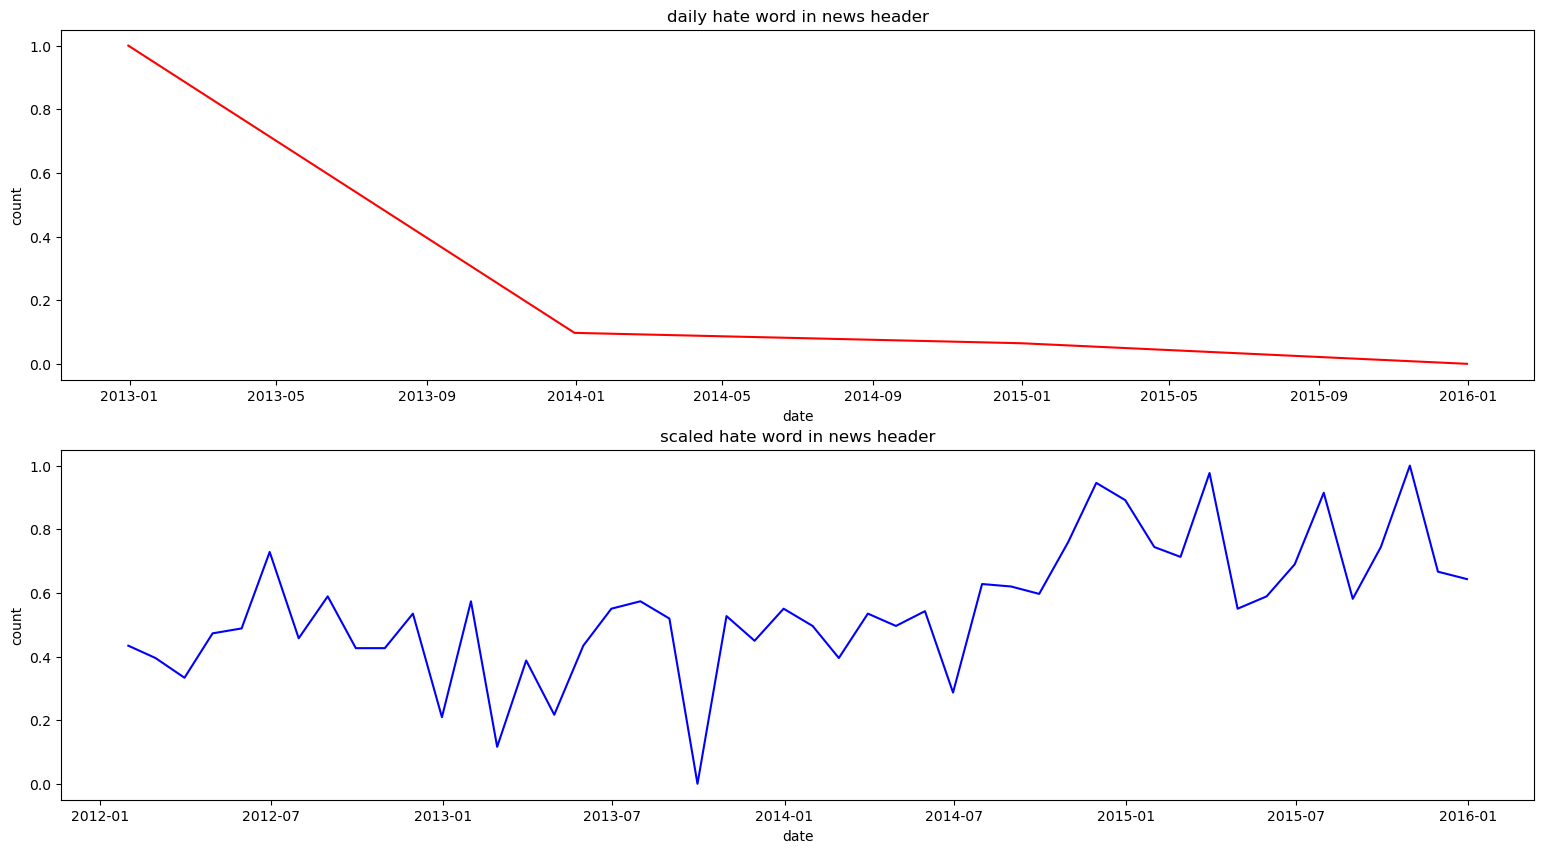

In [74]:
plt.figure(figsize = (19,10))
plt.subplot(2,1,1)
plt.plot(df_year_cnt.index, df_sl_birth, 'r')
plt.title("daily hate word in news header")
plt.xlabel("date")
plt.ylabel("count")

plt.subplot(2,1,2)
plt.plot(df_cnt.index, df_sl_cnt, 'b')
plt.title("scaled hate word in news header")
plt.xlabel("date")
plt.ylabel("count")
plt.show()

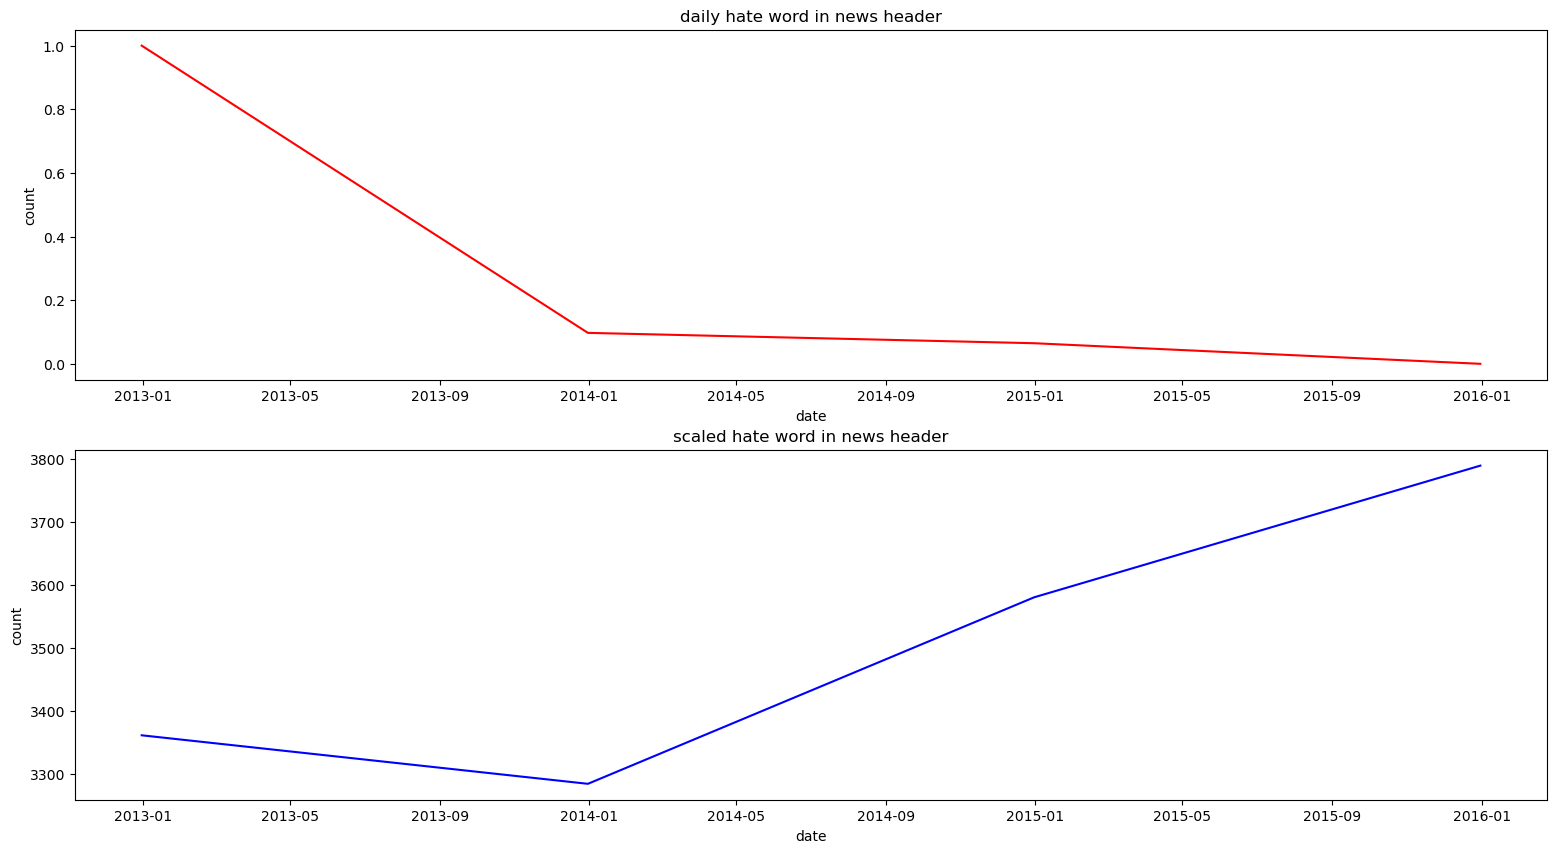

In [76]:
plt.figure(figsize = (19,10))
plt.subplot(2,1,1)
plt.plot(df_year_cnt.index, df_sl_birth, 'r')
plt.title("daily hate word in news header")
plt.xlabel("date")
plt.ylabel("count")

plt.subplot(2,1,2)
plt.plot(df_year_cnt.index, df_year_cnt["year_cnt_sum"], 'b')
plt.title("scaled hate word in news header")
plt.xlabel("date")
plt.ylabel("count")
plt.show()

In [6]:
options = webdriver.ChromeOptions()
#prefs = {'profile.default_content_setting_values': {'cookies' : 2, 'images': 2, 'plugins' : 2, 'popups': 2, 'geolocation': 2, 'notifications' : 2, 'auto_select_certificate': 2, 'fullscreen' : 2, 'mouselock' : 2, 'mixed_script': 2, 'media_stream' : 2, 'media_stream_mic' : 2, 'media_stream_camera': 2, 'protocol_handlers' : 2, 'ppapi_broker' : 2, 'automatic_downloads': 2, 'midi_sysex' : 2, 'push_messaging' : 2, 'ssl_cert_decisions': 2, 'metro_switch_to_desktop' : 2, 'protected_media_identifier': 2, 'app_banner': 2, 'site_engagement' : 2, 'durable_storage' : 2}}   
#options.add_experimental_option('prefs', prefs)
#options.headless = True
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)")
driver = webdriver.Chrome(options=options)
driver.get("https://news.daum.net/breakingnews/society?regDate=20190816")
    
html = driver.page_source
soup = Soup(html, 'html.parser')
header_list = []
data_ix = pd.date_range("2019/01/01",periods=365,freq="D")

df_header = pd.DataFrame(columns=['header'], index= data_ix)
for i in range(365):
    driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div/div[3]/strong/div/span/a[10]").click()
    for j in range(10):
        for n in range(1, 15) :
            n = str(n)
            try :
                header_list.append(driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[3]/ul/li["+n+"]/div/strong/a").text)
            except :
                break
        try :
            driver.find_element(By.XPATH, "/html/body/div[2]/div/div/div[1]/div[3]/div/span/a[11]").click()
        except :
            break
        time.sleep(0.5)
    df_header.iat[i,0] = header_list
    header_list = []
    driver.find_element(By.XPATH, '/html/body/div[2]/div/div/div[1]/div[1]/div/div[1]/a[3]').click()
    time.sleep(0.5)


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=117.0.5938.149)
Stacktrace:
	GetHandleVerifier [0x00007FF6F895AFD2+57938]
	(No symbol) [0x00007FF6F88C7C02]
	(No symbol) [0x00007FF6F877DAAB]
	(No symbol) [0x00007FF6F875DEE8]
	(No symbol) [0x00007FF6F87E3507]
	(No symbol) [0x00007FF6F87F6F1F]
	(No symbol) [0x00007FF6F87DE8C3]
	(No symbol) [0x00007FF6F87B36D1]
	(No symbol) [0x00007FF6F87B4914]
	GetHandleVerifier [0x00007FF6F8CBE772+3611122]
	GetHandleVerifier [0x00007FF6F8D11640+3950784]
	GetHandleVerifier [0x00007FF6F8D0A6EF+3922287]
	GetHandleVerifier [0x00007FF6F89F8996+703510]
	(No symbol) [0x00007FF6F88D2B98]
	(No symbol) [0x00007FF6F88CE754]
	(No symbol) [0x00007FF6F88CE882]
	(No symbol) [0x00007FF6F88BF2A3]
	BaseThreadInitThunk [0x00007FFEDF407344+20]
	RtlUserThreadStart [0x00007FFEE04C26B1+33]
